<h1 align='center'>Demographics and Employment in the united states</h1>

<!--<img style='width: 250px' src='http://www.asianwarrior.com/wp-content/uploads/2016/07/Changing-demographics.jpg'/>
<img style='width: 250px' src='http://crownheights.org/wp-content/uploads/2016/10/employment_law_panel.jpg'/> !-->

<table><tr><td><img src='http://www.asianwarrior.com/wp-content/uploads/2016/07/Changing-demographics.jpg'></td><td><img src='http://crownheights.org/wp-content/uploads/2016/10/employment_law_panel.jpg'></td></tr></table>

In the wake of the Great Recession of 2009, there has been a good deal of focus on employment statistics, one of the most important metrics policymakers use to gauge the overall strength of the economy. In the United States, the government measures unemployment using the Current Population Survey (CPS), which collects demographic and employment information from a wide range of Americans each month. In this exercise, we will employ the topics reviewed in the lectures as well as a few new techniques using the September 2013 version of this rich, nationally representative dataset (available online).

The observations in the dataset represent people surveyed in the September 2013 CPS who actually completed a survey. While the full dataset has 385 variables, in this exercise we will use a more compact version of the dataset, CPSData.csv, which has the following variables:

**PeopleInHousehold**: The number of people in the interviewee's household.

**Region**: The census region where the interviewee lives.

**State**: The state where the interviewee lives.

**MetroAreaCode**: A code that identifies the metropolitan area in which the interviewee lives (missing if the interviewee does not live in a metropolitan area). The mapping from codes to names of metropolitan areas is provided in the file MetroAreaCodes.csv.

**Age**: The age, in years, of the interviewee. 80 represents people aged 80-84, and 85 represents people aged 85 and higher.

**Married**: The marriage status of the interviewee.

**Sex**: The sex of the interviewee.

**Education**: The maximum level of education obtained by the interviewee.

**Race**: The race of the interviewee.

**Hispanic**: Whether the interviewee is of Hispanic ethnicity.

**CountryOfBirthCode**: A code identifying the country of birth of the interviewee. The mapping from codes to names of countries is provided in the file CountryCodes.csv.

**Citizenship**: The United States citizenship status of the interviewee.

**EmploymentStatus**: The status of employment of the interviewee.

**Industry**: The industry of employment of the interviewee (only available if they are employed).

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [5]:
cps = pd.read_csv('data/CPSData.csv')

<h1 align='center'>Getting to know the data</h1>

In [6]:
cps.head()

,PeopleInHousehold,Region,State,MetroAreaCode,Age,Married,Sex,Education,Race,Hispanic,CountryOfBirthCode,Citizenship,EmploymentStatus,Industry
0,1,South,Alabama,26620.0,85,Widowed,Female,Associate degree,White,0,57,"Citizen, Native",Retired,NaN
1,3,South,Alabama,13820.0,21,Never Married,Male,High school,Black,0,57,"Citizen, Native",Unemployed,Professional and business services
2,3,South,Alabama,13820.0,37,Never Married,Female,High school,Black,0,57,"Citizen, Native",Disabled,NaN
3,3,South,Alabama,13820.0,18,Never Married,Male,No high school diploma,Black,0,57,"Citizen, Native",Not in Labor Force,NaN
4,3,South,Alabama,26620.0,52,Widowed,Female,Associate degree,White,0,57,"Citizen, Native",Employed,Professional and business services


In [7]:
print(cps.shape)
print(cps.describe().T)

(131302, 14)
                       count          mean           std      min      25%  \
PeopleInHousehold   131302.0      3.284276      1.700173      1.0      2.0   
MetroAreaCode        97064.0  35074.709264  16551.637597  10420.0  21780.0   
Age                 131302.0     38.829226     22.897130      0.0     19.0   
Hispanic            131302.0      0.139328      0.346289      0.0      0.0   
CountryOfBirthCode  131302.0     82.684079     75.476511     57.0     57.0   

                        50%      75%      max  
PeopleInHousehold       3.0      4.0     15.0  
MetroAreaCode       34740.0  41860.0  79600.0  
Age                    39.0     57.0     85.0  
Hispanic                0.0      0.0      1.0  
CountryOfBirthCode     57.0     57.0    555.0  


In [8]:
print(cps.dtypes)

PeopleInHousehold       int64
Region                 object
State                  object
MetroAreaCode         float64
Age                     int64
Married                object
Sex                    object
Education              object
Race                   object
Hispanic                int64
CountryOfBirthCode      int64
Citizenship            object
EmploymentStatus       object
Industry               object
dtype: object


In [9]:
cps.isnull().sum()

PeopleInHousehold         0
Region                    0
State                     0
MetroAreaCode         34238
Age                       0
Married               25338
Sex                       0
Education             25338
Race                      0
Hispanic                  0
CountryOfBirthCode        0
Citizenship               0
EmploymentStatus      25789
Industry              65060
dtype: int64

<h1 align=center>Assignment Questions</h1>

In [10]:
# 1 - How many interviewees are in the dataset?
print(cps.shape[0])

131302


In [11]:
# 2 - Among the interviewees with a value reported for the Industry variable, what is the most common industry of employment?
# Please enter the name exactly how you see it.
cps.Industry.value_counts()

# ans: Educational and health services

Educational and health services                15017
Trade                                           8933
Professional and business services              7519
Manufacturing                                   6791
Leisure and hospitality                         6364
Construction                                    4387
Financial                                       4347
Transportation and utilities                    3260
Other services                                  3224
Public administration                           3186
Information                                     1328
Agriculture, forestry, fishing, and hunting     1307
Mining                                           550
Armed forces                                      29
Name: Industry, dtype: int64

In [12]:
# 3 - Which state has the fewest interviewees?
# 4 - Which state has the largest number of interviewees?

cps.State.value_counts()

# ans(3): New Mexico
# ans(4): California

California              11570
Texas                    7077
New York                 5595
Florida                  5149
Pennsylvania             3930
Illinois                 3912
Ohio                     3678
Maryland                 3200
Minnesota                3139
Michigan                 3063
Virginia                 2953
Colorado                 2925
Connecticut              2836
Georgia                  2807
Wisconsin                2686
New Hampshire            2662
North Carolina           2619
New Jersey               2567
Iowa                     2528
Washington               2366
Maine                    2263
Delaware                 2214
Rhode Island             2209
Missouri                 2145
Hawaii                   2099
Indiana                  2004
South Dakota             2000
Massachusetts            1987
Nebraska                 1949
Oregon                   1943
Kansas                   1935
Vermont                  1890
Nevada                   1856
Utah      

In [13]:
# 5 - What proportion of interviewees are citizens of the United States? (proportion: [0, 1])

value_count = cps.Citizenship.value_counts()  # save into a variable to avoid repetition
print(value_count, end='\n\n')

total_citizens = value_count[value_count.index.str.startswith('Citizen')].sum()  # 116639 + 7073
print(f'Total number of citizens interviewed: {total_citizens / value_count.values.sum()}')

Citizen, Native         116639
Non-Citizen               7590
Citizen, Naturalized      7073
Name: Citizenship, dtype: int64

Total number of citizens interviewed: 0.9421943306271039


In [14]:
# 6 - The CPS differentiates between race (with possible values American Indian, Asian, Black,
# Pacific Islander, White, or Multiracial) and ethnicity.
# A number of interviewees are of Hispanic ethnicity, as captured by the Hispanic variable.

# For which races are there at least 250 interviewees in the CPS dataset of Hispanic ethnicity?

cps.Race[cps.Hispanic == 1].value_counts()

# ans: White, Black, Multiracial, American Indian

White               16731
Black                 621
Multiracial           448
American Indian       304
Asian                 113
Pacific Islander       77
Name: Race, dtype: int64

In [15]:
# Similar answer but not as clear (Must look for Hispanic entries where Race is 1)
cps.groupby(['Race', 'Hispanic']).size()

Race              Hispanic
American Indian   0            1129
                  1             304
Asian             0            6407
                  1             113
Black             0           13292
                  1             621
Multiracial       0            2449
                  1             448
Pacific Islander  0             541
                  1              77
White             0           89190
                  1           16731
dtype: int64

In [16]:
# 7 - Which variables have at least one interviewee with a missing (NA) value?
cps.isnull().sum()

PeopleInHousehold         0
Region                    0
State                     0
MetroAreaCode         34238
Age                       0
Married               25338
Sex                       0
Education             25338
Race                      0
Hispanic                  0
CountryOfBirthCode        0
Citizenship               0
EmploymentStatus      25789
Industry              65060
dtype: int64

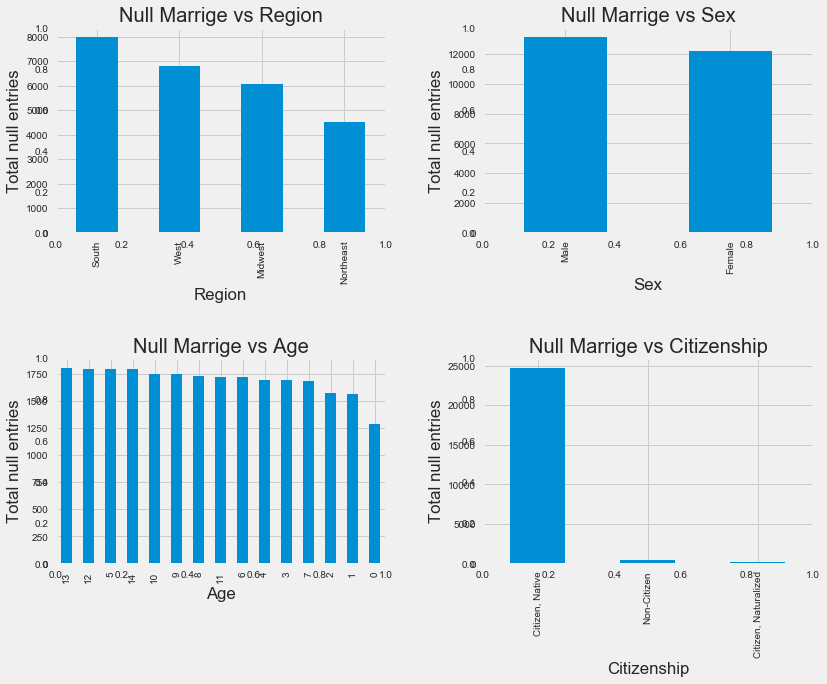

In [17]:
# 8 - Often when evaluating a new dataset, we try to identify if there is a pattern in the missing values in the dataset.
# We will try to determine if there is a pattern in the missing values of the Married variable.
# Which column is related to the missing values in the Married column


fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for index, column in zip(range(4), ['Region', 'Sex', 'Age', 'Citizenship']):
    value_count = cps[column][cps.Married.isnull()].value_counts()
    ax = fig.add_subplot(2, 2, index+1)
    value_count.plot(kind='bar', ax=ax, title='Null Marrige vs {}'.format(column))
    ax.set_xlabel(column)
    ax.set_ylabel('Total null entries')
plt.tight_layout()
plt.show()

# for column in ['Region', 'Sex', 'Age', 'Citizenship']:
#     fig = plt.figure()
#     cps[column][cps.Married.isnull()].value_counts().plot(kind='barh')
# plt.show()


# ans: According to my eyes I see a relation with the the Citizenship column. It seems to me that the native citizens
#      have much more null values in the Married column
#      However, the answer in the course is only refering to the Age column.
#      Interviewees between the ages of (0, 14) have null values for the married column.
#      Because of their young ages, they are not asked that question to beging with

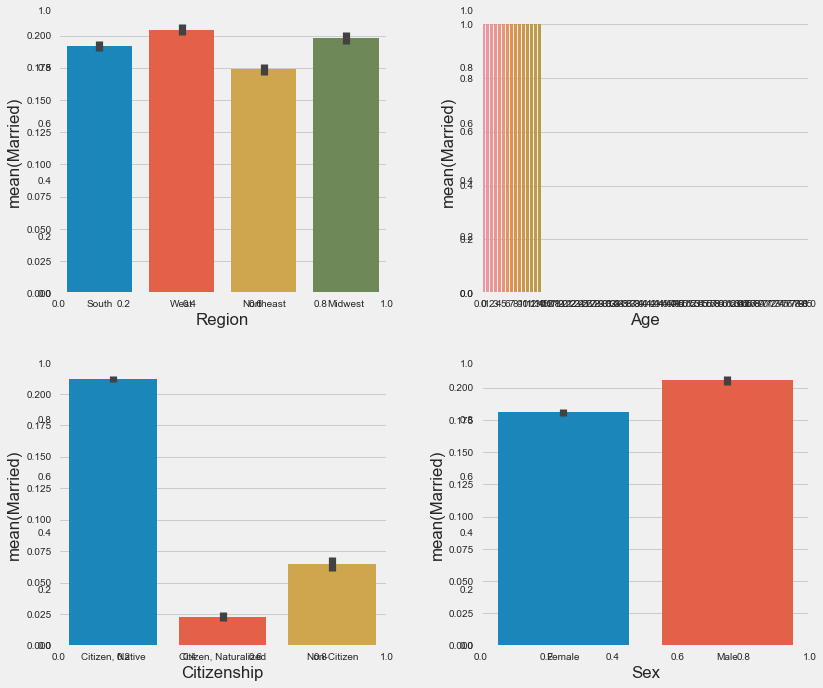

In [18]:
# Same question using seaborn
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, j in zip(range(4), ['Region', 'Age', 'Citizenship', 'Sex']):
    ax = fig.add_subplot(2, 2, i+1)
    sns.barplot(x=cps[j], y=cps.Married.isnull(), ax=ax)
sns.plt.tight_layout()
sns.plt.show()

In [19]:
# 9 - MetroAreaCode is missing if an interviewee does not live in a metropolitan area.
# Using the same technique as in the previous question, answer the following questions about
# people who live in non-metropolitan areas.

# 9.1 - How many states had all interviewees living in a non-metropolitan area (aka they have a missing MetroAreaCode value)?
# For this question, treat the District of Columbia as a state (even though it is not technically a state).

x = cps.State[cps.MetroAreaCode.isnull()].value_counts()
y = cps.State.value_counts()

for i in x:
    for j in y:
        if i == j:
            print(i)
print(y[y == 1624].index[0], y[y == 1590].index[0], sep='\t', end='\n\n')  

# ans(9.1): 2 -> Wyoming and Alaska

# 9.2 - How many states had all interviewees living in a metropolitan area? Again, treat the District of Columbia as a state.
z = cps.MetroAreaCode.value_counts()
s = cps.State[~cps.MetroAreaCode.isnull()].value_counts()

for i in s:
    for j in y:
        if i == j:
            print(i)
            
print(s[s == 2567].index[0], s[s == 2209].index[0], s[s == 1791].index[0], sep='\t')

1624
1590
Wyoming	Alaska

2567
2209
1791
New Jersey	Rhode Island	District of Columbia


In [23]:
# 10 - Which region of the United States has the largest proportion of interviewees living in a non-metropolitan area?
cps.Region[cps.MetroAreaCode.isnull()].value_counts()

# ans: Midwest

Midwest      10674
South         9871
West          8084
Northeast     5609
Name: Region, dtype: int64

In [177]:
# 11 - Which state has a proportion of interviewees living in a non-metropolitan area closest to 30%?
# 12 - Which state has the largest proportion of non-metropolitan interviewees, ignoring states
#      where all interviewees were non-metropolitan?


# total number of people living in non-metropolitan area in each state
val_counts = cps.State[cps.MetroAreaCode.isnull()].value_counts()

# total number of people living in the state
s = cps.State.value_counts()

for i in val_counts.index:
    print(f'{i:20} {val_counts[i] / s[i] * 100}')
    
# ans(11): Wisconsin
# ans(12): Montana

Wyoming              100.0
Alaska               100.0
New Hampshire        56.874530428249436
South Dakota         70.25
Maine                59.83208130799823
Vermont              65.23809523809524
Iowa                 48.69462025316456
North Dakota         73.73860182370821
Nebraska             58.132375577219086
West Virginia        75.58552164655784
Texas                14.37049597286986
Montana              83.60790774299835
Minnesota            31.506849315068493
North Carolina       37.30431462390225
Kentucky             50.678978815860944
Ohio                 25.122349102773246
Mississippi          69.4308943089431
Wisconsin            29.932985852568876
Idaho                49.86824769433465
Missouri             32.86713286713287
Kansas               36.22739018087856
Arkansas             49.04996481351161
Pennsylvania         17.43002544529262
Tennessee            35.59417040358744
Virginia             19.844226210633252
Indiana              29.141716566866265
Georgia        

In [176]:
# Codes like MetroAreaCode and CountryOfBirthCode are a compact way to encode factor variables with text
# as their possible values, and they are therefore quite common in survey datasets.
# In fact, all but one of the variables in this dataset were actually stored by a numeric code
# in the original CPS datafile.

# When analyzing a variable stored by a numeric code, we will often want to convert it into the values
# the codes represent. To do this, we will use a dictionary, which maps the the code to the actual value
# of the variable. We have provided dictionaries MetroAreaCodes.csv and CountryCodes.csv, which respectively
# map MetroAreaCode and CountryOfBirthCode into their true values. Read these two dictionaries into data
# frames MetroAreaMap and CountryMap.


# 13 - How many observations (codes for metropolitan areas) are there in MetroAreaMap?
# 14 - How many observations (codes for countries) are there in CountryMap?


metro = pd.read_csv('data/MetroAreaCodes.csv')

print(metro.shape)
print(country.shape)

(271, 2)
(149, 2)


In [123]:
# To merge in the metropolitan areas,
# we want to connect the field MetroAreaCode from the CPS data frame with the field Code in MetroAreaMap. 


merged = pd.merge(cps, metro, how='left', left_on='MetroAreaCode', right_on='Code')
merged.head()

,PeopleInHousehold,Region,State,MetroAreaCode,Age,Married,Sex,Education,Race,Hispanic,CountryOfBirthCode,Citizenship,EmploymentStatus,Industry,Code,MetroArea
0,1,South,Alabama,26620,85,Widowed,Female,Associate degree,White,0,57,"Citizen, Native",Retired,NaN,26620.0,"Huntsville, AL"
1,3,South,Alabama,13820,21,Never Married,Male,High school,Black,0,57,"Citizen, Native",Unemployed,Professional and business services,13820.0,"Birmingham-Hoover, AL"
2,3,South,Alabama,13820,37,Never Married,Female,High school,Black,0,57,"Citizen, Native",Disabled,NaN,13820.0,"Birmingham-Hoover, AL"
3,3,South,Alabama,13820,18,Never Married,Male,No high school diploma,Black,0,57,"Citizen, Native",Not in Labor Force,NaN,13820.0,"Birmingham-Hoover, AL"
4,3,South,Alabama,26620,52,Widowed,Female,Associate degree,White,0,57,"Citizen, Native",Employed,Professional and business services,26620.0,"Huntsville, AL"


In [ ]:
# 15 - What is the name of the variable that was added to the data frame by the merge() operation?

# ans: actually two columns have been added, Code and MetroArea. But Code is the exact copy of MetroAreaCode
# So MetroArea is the column that adds new information to the dataframe

In [124]:
# 16 - How many interviewees have a missing value for the new metropolitan area variable?


merged.MetroArea.isnull().value_counts()

# ans : 34238

False    97064
True     34238
Name: MetroArea, dtype: int64

In [130]:
# 17 - Which of the following metropolitan areas has the largest number of interviewees?


val_counts = merged.MetroArea[~merged.MetroArea.isnull()].value_counts()

print(val_counts['Atlanta-Sandy Springs-Marietta, GA'])
print(val_counts['Baltimore-Towson, MD'])
print(val_counts['Boston-Cambridge-Quincy, MA-NH'])
print(val_counts['San Francisco-Oakland-Fremont, CA'])

# ans: Boston-Cambridge-Quincy with 2229 interviewees

1552
1483
2229
1386


In [178]:
# 18 - Which metropolitan area has the highest proportion of interviewees of Hispanic ethnicity? 

his = merged.MetroArea[merged.Hispanic == 1].value_counts()
tot = merged.MetroArea[merged.Hispanic == 0].value_counts().sum()
(merged.groupby('MetroArea')['Hispanic'].mean() * 100).sort_values(ascending=False)

# ans: Laredo, TX with 96.6%

MetroArea
Laredo, TX                               96.629213
McAllen-Edinburg-Pharr, TX               94.871795
Brownsville-Harlingen, TX                79.746835
El Paso, TX                              79.098361
El Centro, CA                            68.686869
San Antonio, TX                          64.415157
Madera, CA                               61.403509
Corpus Christi, TX                       60.606061
Merced, CA                               56.603774
Salinas, CA                              55.769231
Las Cruses, NM                           54.205607
Tucson, AZ                               50.662252
Riverside-San Bernardino, CA             50.232558
Bakersfield, CA                          48.979592
Miami-Fort Lauderdale-Miami Beach, FL    46.782497
Victoria, TX                             46.551724
Santa Fe, NM                             46.153846
Los Angeles-Long Beach-Santa Ana, CA     46.026329
Albuquerque, NM                          44.170772
Cape Coral-Fort Myers

In [287]:
# 19 - Determine the number of metropolitan areas in the United States from which
#      at least 20% of interviewees are Asian.

x = merged.MetroArea[merged.Race == 'Asian'].value_counts()
y = merged.MetroArea[~merged.MetroArea.isnull()].value_counts()
# y =  len(merged.MetroArea) - merged.MetroArea.isnull().sum()

answerList = []

for i in x:
    index = x[x == i].index[0]
    deno = y[index]
    answerList.append(i / deno * 100)

sorted(answerList)[::-1][:10]  # Just get the first ten. We only need the metro areas with greater than 20% asians


# ans: 4

[50.190355329949242,
 24.675324675324674,
 24.17910447761194,
 24.17910447761194,
 18.481848184818482,
 15.544041450777202,
 15.544041450777202,
 14.242878560719641,
 14.222712238147739,
 13.505607020965382]

In [367]:
# 20 - determine which metropolitan area has the smallest proportion
#      of interviewees who have received no high school diploma.


x = merged.MetroArea[merged.Education == 'No high school diploma'].value_counts()
y = merged.MetroArea.value_counts()

least_metro_area, least_prop = '', 100
answerDict = {}
for i in x:
    index = x[x == i].index[0]  # which metro area
    deno  = y[index]            # total number of interview for the current metro area
    currProp = i / deno
    if currProp < least_prop:
        least_prop = currProp * 100
        least_metro_area = index
        answerDict[index] = currProp

print(least_metro_area, least_prop)

from operator import itemgetter

sorted(answerDict.items(), key=itemgetter(1))

# The correct answer is 'Iowa City, IA' and not 'Bowling Green, KY
# I've created the answerDict just to look closer at the answer I've got
# I've given up on finding the right answer here

Bowling Green, KY 3.44827586207


[('Bowling Green, KY', 0.034482758620689655),
 ('Champaign-Urbana, IL', 0.040983606557377046),
 ('Gainesville, FL', 0.057142857142857141),
 ('Fort Collins-Loveland, CO', 0.058252427184466021),
 ('Ocean City, NJ', 0.066666666666666666),
 ('Tallahassee, FL', 0.069767441860465115),
 ('Burlington-South Burlington, VT', 0.070015220700152203),
 ('Bridgeport-Stamford-Norwalk, CT', 0.078082191780821916),
 ('Portland-South Portland, ME', 0.085592011412268187),
 ('Tampa-St. Petersburg-Clearwater, FL', 0.086698337292161518),
 ('Provo-Orem, UT', 0.087378640776699032),
 ('Honolulu, HI', 0.087563451776649745),
 ('Boston-Cambridge-Quincy, MA-NH', 0.090174966352624494),
 ('Minneapolis-St Paul-Bloomington, MN-WI', 0.094747682801235841),
 ('Washington-Arlington-Alexandria, DC-VA-MD-WV', 0.09552310270529088),
 ('Kansas City, MO-KS', 0.096673596673596679),
 ('Colorado Springs, CO', 0.096774193548387094),
 ('Seattle-Tacoma-Bellevue, WA', 0.098804780876494025),
 ('Baton Rouge, LA', 0.099236641221374045),
 (

In [381]:
# Just as we did with the metropolitan area information, merge in the country of birth information from
# the CountryMap data frame, replacing the CPS data frame with the result.

# 21 - What is the name of the variable added to the CPS data frame by this merge operation?
country = pd.read_csv('data/CountryCodes.csv')
country.head()

# Dropped the code column since it's just a replica of CountryOfBirth column
second = pd.merge(cps, country, how='left', left_on='CountryOfBirthCode', right_on='Code').drop('Code', axis=1)
second.head()

# ans: Country

,PeopleInHousehold,Region,State,MetroAreaCode,Age,Married,Sex,Education,Race,Hispanic,CountryOfBirthCode,Citizenship,EmploymentStatus,Industry,Country
0,1,South,Alabama,26620.0,85,Widowed,Female,Associate degree,White,0,57,"Citizen, Native",Retired,NaN,United States
1,3,South,Alabama,13820.0,21,Never Married,Male,High school,Black,0,57,"Citizen, Native",Unemployed,Professional and business services,United States
2,3,South,Alabama,13820.0,37,Never Married,Female,High school,Black,0,57,"Citizen, Native",Disabled,NaN,United States
3,3,South,Alabama,13820.0,18,Never Married,Male,No high school diploma,Black,0,57,"Citizen, Native",Not in Labor Force,NaN,United States
4,3,South,Alabama,26620.0,52,Widowed,Female,Associate degree,White,0,57,"Citizen, Native",Employed,Professional and business services,United States


In [382]:
# 23 - How many interviewees have a missing value for the new country of birth variable?
second.Country.isnull().sum()

# ans: 176

176

In [390]:
# 24 - Among all interviewees born outside of North America, which country was the most common place of birth?

val_counts = second.Country.value_counts()
# total_outside_US = val_counts[ ~val_counts.index.isin(['United States']) ].sum()
val_counts[~val_counts.index.isin(['United States', 'Mexico', 'Canada', 'Costa Rica', 'Cuba'])][:10]

# ans: Philipines

Philippines           839
India                 770
China                 581
Puerto Rico           518
El Salvador           477
Vietnam               458
Germany               438
Korea                 334
Dominican Republic    330
Guatemala             309
Name: Country, dtype: int64

In [407]:
# 25 - What proportion of the interviewees from the "New York-Northern New Jersey-Long Island, NY-NJ-PA"
#      have a country of birth that is not the United States?

val_counts = second.Country[merged.MetroArea == 'New York-Northern New Jersey-Long Island, NY-NJ-PA'].value_counts()
total_not_from_USA = val_counts[~val_counts.index.isin(['United States'])].sum()

total_not_from_USA / val_counts.sum()

# ans: 0.309

0.30866025166543304

In [416]:
# 26 - Which metropolitan area has the largest number (note -- not proportion)
#      of interviewees with a country of birth in India, Brazil and Somalia?

print(merged.MetroArea[second.Country == 'India'].value_counts()[:3], end='\n\n')
print(merged.MetroArea[second.Country == 'Brazil'].value_counts()[:3], end='\n\n')
print(merged.MetroArea[second.Country == 'Somalia'].value_counts()[:3], end='\n\n')

# ans: India   ->  New York-Northern New Jersey-Long Island, NY-NJ-PA
#      Brazil  ->  Boston-Cambridge-Quincy, MA-NH
#      Somalia ->  Minneapolis-St Paul-Bloomington, MN-WI

New York-Northern New Jersey-Long Island, NY-NJ-PA    96
Washington-Arlington-Alexandria, DC-VA-MD-WV          50
Philadelphia-Camden-Wilmington, PA-NJ-DE              32
Name: MetroArea, dtype: int64

Boston-Cambridge-Quincy, MA-NH           18
Miami-Fort Lauderdale-Miami Beach, FL    16
Los Angeles-Long Beach-Santa Ana, CA      9
Name: MetroArea, dtype: int64

Minneapolis-St Paul-Bloomington, MN-WI    17
St. Cloud, MN                              7
Phoenix-Mesa-Scottsdale, AZ                7
Name: MetroArea, dtype: int64

